# Comparing scenes



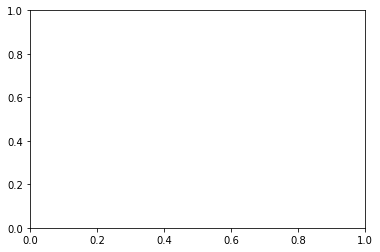

In [1]:
# Load the necessary modules
from navipy.database import DataBase
from matplotlib.image import imsave
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the database, and specify the
# the output directory to save the list
# of images
import pkg_resources
# Use the trafile from the resources
# You can adapt this code, by changing trajfile 
# with your own trajectory file
database = pkg_resources.resource_filename(
    'navipy',
    'resources/database.db')
database_dir, _ = os.path.splitext(database)
if not os.path.exists(database_dir):
    os.makedirs(database_dir)
database_template = os.path.join(database_dir, 'frame_{}.png')
# Load two scene, currrent and memory
mydb = DataBase(database)
my_scene_current = mydb.scene(posorient=mydb.posorients.iloc[0])
my_scene_memory = mydb.scene(posorient=mydb.posorients.iloc[5])

## Image differences

Within a certain range of a goal location, the difference between memorized and currently experienced views can provide instructions on how to move towards the goal.

The strong colour contrast of terrestrial objects against the sky may be of particular importance to localization and the demonstration that in outdoor scenes, panoramic image differences develop smoothly with distance from a reference location (translational Image Difference Functions, IDFs) and in addition, provide robust visual compass information (rotational IDFs) [Zeil 2012, Visual homing: an insect perspective].

### Translational

In [2]:
from navipy.comparing import imagediff
tidf = imagediff(my_scene_current, my_scene_memory)
tidf

array([[1.09429471e-03],
       [1.22631411e-03],
       [5.04916451e-04],
       [2.91033150e+00]])

### Rotational

Rotational IDFs is done as follow: The current view is rotated by $\alpha$ and compared pixelwise to the memorised image:
$$RIDF(\alpha) = \sum_i\sum_j \|rot(C(i,j),\alpha) - M(i,j)\| $$

Text(0,0.5,'IDF')

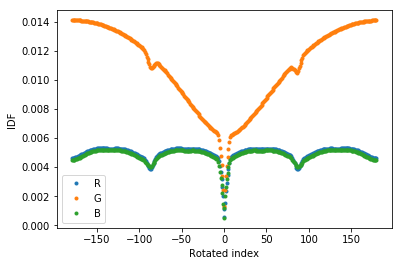

In [3]:
from navipy.comparing import rot_imagediff
view_dir = mydb.viewing_directions
azimuth = view_dir[...,1]
# Calculate image diff
rotdf = rot_imagediff(my_scene_current, my_scene_memory)
# Place it in a dataframe with 
# here index is alpha, the rotation
# of the current image
alpha = -np.linspace(0,np.max(azimuth)-np.min(azimuth),rotdf.shape[0])
alpha = np.deg2rad(alpha)
alpha = np.arctan2(np.sin(alpha),np.cos(alpha))
alpha = np.rad2deg(alpha)
rotdf = pd.DataFrame(index=alpha,columns = ['R','G','B','D'],data=rotdf)
# 
rotdf.drop('D',axis=1).plot(style='.')
plt.xlabel('Rotated index')
plt.ylabel('IDF')